## Table of Content

- Fit the Data for LDA

- Logistic Regression using LDA

- SVM using LDA

**PCA and LDA are Feature Extraction techniques.**

- They will give us sort of new features which are a linear combination of exsisting features.
- The new features will have diffrent values than the original features.

Th main aim is to perform Dimentionality reduction by using *less features* to capture and convey same information.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

%matplotlib inline

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

df.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

In [3]:
df.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot examples by class
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    color=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl,s=20)

### Fit the data for LDA

- We cannot trust PCA for classification problems because it hampers our data and class seperability is not guaranteed.But still if we want to go for Dimentionality Reduction then we can choose LDA.

- The main diffrence between LDA and PCA is:
   1. LDA is *supervised*  PCA is *unsupervised*
   2. LDA =Discribes the direction of **maximum seperability**  PCA=discribes direction of **maximum variance** in data.
   3. LDA requires class_label information unlike PCA to perform fit()

In [5]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split

X, y = df.iloc[:, 1:], df.iloc[:, 0]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=5,stratify=y)

In [6]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_train_std=scaler.fit_transform(X_train)
X_test_std=scaler.transform(X_test)

In [7]:
lda=LDA(n_components=2)
X_train_lda=lda.fit_transform(X_train_std,y_train)
X_test_lda=lda.transform(X_test_std)

### LogisticRegression

In [8]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression(solver='lbfgs',multi_class='ovr')
model.fit(X_train_lda,y_train)

LogisticRegression(multi_class='ovr')

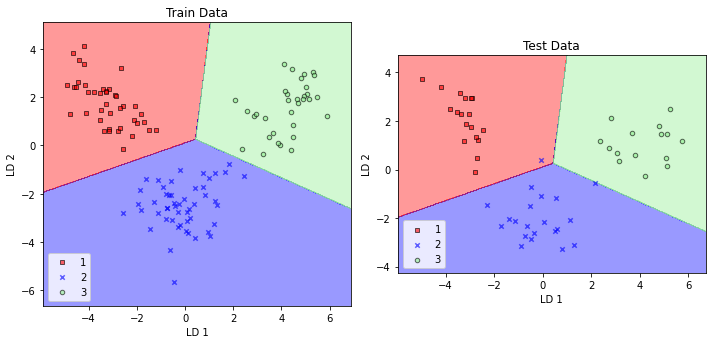

In [9]:
plt.figure(figsize=(10,10))

plt.subplot(1,2,1,aspect='equal')
plot_decision_regions(X_train_lda, y_train,model)

plt.title('Train Data')
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')


plt.subplot(1,2,2,aspect='equal')
plot_decision_regions(X_test_lda, y_test,model)

plt.title('Test Data')
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')


plt.tight_layout()
plt.savefig('LDA_1.png')
plt.show()

In [10]:
print('Logistic Regression accuracy on Train Data->',model.score(X_train_lda, y_train))
print('Logistic Regression accuracy on Test Data->',model.score(X_test_lda, y_test))

Logistic Regression accuracy on Train Data-> 1.0
Logistic Regression accuracy on Test Data-> 0.9814814814814815


#### - We can see that LDA is a linear model classifier.Therefore feeding the LDA features to another linear models(Logistics Regression) is not beneficial.

#### - Instead if we want we can try using LDA with non-linear models(SVM,KNN..)

### SVC+LDA

In [11]:
from sklearn.svm import SVC

In [17]:
svc=SVC(C=1.0,kernel='linear')

svc.fit(X_train_lda,y_train)

SVC(kernel='linear')

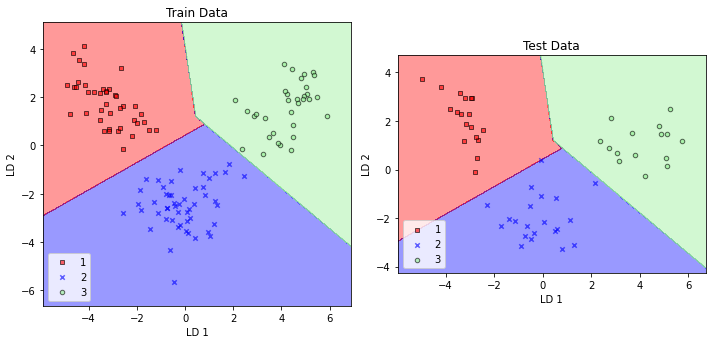

In [18]:
plt.figure(figsize=(10,10))

plt.subplot(1,2,1,aspect='equal')
plot_decision_regions(X_train_lda, y_train,svc)

plt.title('Train Data')
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')


plt.subplot(1,2,2,aspect='equal')
plot_decision_regions(X_test_lda, y_test,svc)

plt.title('Test Data')
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')


plt.tight_layout()
plt.savefig('LDA_3.png')
plt.show()

In [19]:
print('SVC accuracy on Train Data->',svc.score(X_train_lda, y_train))
print('SVC accuracy on Test Data->',svc.score(X_test_lda, y_test))

SVC accuracy on Train Data-> 1.0
SVC accuracy on Test Data-> 1.0


#### We can clearly see that LDA performs better when used with non-linear algorithms

### Refrences

- https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch05/ch05.ipynb

- https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html#sphx-glr-auto-examples-decomposition-plot-pca-vs-lda-py